In [1]:
import numpy as np
import networkx as nx
#from networkx.classes.multigraph import MultiGraph
import matplotlib.pyplot as plt
import matplotlib.cm as cm

nodes = []
vertex_pairs = []
labels = {}

# Functions
1. `enter_nodes()`:  User is prompted to enter list of vertices in graph
1. `enter_single_edge_per_node(nodes, vertex_pairs)`: User is prompted to enter an adjacent edge for given vertex
1. `enter_multiple_edges_per_node(nodes, vertex_pairs): `User is prompted to enter adjacent edges for given vertex
1. `create_edge_labels(vertex_pairs, labels, nodes)`: Create labels for edges
1. `create_graph(labels)`: Create the graph based on vertices and labels
1. `print_adj_matrix(graph)`: Print an adjacency matrix
1. `print_graph_stats(graph)`: Print vertex pairs and edges and other graph statistics
1. `print_matrix(graph)`: Print visual matrix representation of graph
1. `print_path(graph,start,end)`: Print path with no repeating vertices given starting and ending vertex
1. 'print_cycle(graph,start,end): to be implemented

In [2]:
def enter_nodes():
    n = int(input("Enter the amount of nodes you wish to add: "))
    #need error handling for invalid entry
    for i in range(n):
        node = input("Enter node " + str(i+1) + ": ")
        nodes.append(node)
    return nodes
    
def enter_single_edge_per_node(nodes, vertex_pairs):   
    for i in range(len(nodes)):
        v2 = input("Enter the adjacent vertex for node " + nodes[i] +": ")
        while v2 not in nodes:
            print("Invalid vertex. This vertex was not added.")
            v2 = input("Enter the adjacent vertex for node " + nodes[i] +": ")        
        vertex_pair = nodes[i],v2
        vertex_pairs.append(vertex_pair)
    return vertex_pairs
    
def enter_multiple_edges_per_node(nodes, vertex_pairs):
    for i in range(len(nodes)):
        v2 = ''
        while(v2!='\\'):
            v2 = input("Enter \ to move on to next node, or enter adjacent vertex for node " +nodes[i]+": ")
            if v2!='\\':
                while v2 not in nodes:
                    print("Invalid vertex. This vertex was not added.")
                    v2 = input("Enter \ to move on to next node, or enter adjacent vertex for node " +nodes[i]+": ")
                vertex_pair = nodes[i],v2
                vertex_pairs.append(vertex_pair)
    return vertex_pairs

def create_edge_labels(vertex_pairs, labels, nodes):
    x = input("Enter s for Single edge, or m for Multiple edges: ")
    if(x=='m'):
        vertex_pairs = enter_multiple_edges_per_node(nodes, vertex_pairs)
    elif(x=='s'):
        vertex_pairs = enter_single_edge_per_node(nodes, vertex_pairs)
    else:
        print("Invalid selection. Defaulting to Single edge.")
        vertex_pairs = enter_single_edge_per_node(nodes, vertex_pairs)
        
    i=0    
    for v in vertex_pairs:    
        i=i+1
        edge = 'e' + str(i)
        #print("Edge is labeled: ", edge)
        labels.update({tuple(v):edge})
    return labels, vertex_pairs   

def create_graph(labels):
    graph = input("Enter G for Graph or D for Directed Graph: ")
    if(graph=='G') or (graph=='g'):
        G=nx.Graph()
    elif(graph=='D') or (graph=='d'):
        G=nx.DiGraph()
    else:
        print("Invalid selection. Defaulting to Graph.")
        G=nx.Graph()
        
    G.add_edges_from(labels)
    pos = nx.shell_layout(G)
    plt.figure()    
    nx.draw(G,pos,edge_color='skyblue',width=1,linewidths=1,node_size=800,node_color='skyblue', alpha=0.9, labels={node:node for node in G.nodes()})
    nx.draw_networkx_edge_labels(G,pos,edge_labels=labels,font_color='black', font_size=12)
    plt.axis('off')
    plt.show()
    return G

def print_adj_matrix(graph):
    print("Adjacency matrix: ")
    A=nx.adjacency_matrix(graph)
    print(A.todense())
    print('\n')

def print_graph_stats(graph):
    print("*Graph Statistics")
    print("----------------_-")
    print("Number of vertices:" , len(graph))
    print("Number of edges:" , len(graph.edges))
    print("Vertices:", list(graph.nodes())) #data = True for metadata
    print("Vertices with self loops:", list(graph.nodes_with_selfloops()))
    #print("Edges: ", list(G.edges))
    print("Edge | vertex_pairs")
    for keys, values in labels.items():
        print(' ',values,"|",'(%s)' % ', '.join(map(str, keys)))
        
def print_matrix(graph):
    A = nx.to_numpy_matrix(graph)
    fig = plt.figure()
    ax1 = fig.add_subplot(121)
    ax1.imshow(A, cmap="Blues") #, interpolation='nearest' cmap=cm.Greys_r  "Set3"
    ax1.set_xticks(np.arange(0,len(nodes), step=1))
    ax1.set_xticklabels(nodes)
    ax1.xaxis.tick_top()
    ax1.xaxis.set_label_position('top')
    #line = [(0, 5), (0, 0), (5, 0)]
    #path = patches.Polygon(line, facecolor='none', edgecolor='black', linewidth=2, closed=True, joinstyle='round')
    #ax1.add_patch(path)
    plt.yticks(np.arange(0,len(nodes), step=1),nodes)
    plt.show()
    
def print_path(graph,start,end):
    for path in nx.all_simple_paths(graph, source=start, target=end):
        print(path)
        

Enter the amount of nodes you wish to add: 8
Enter node 1: a
Enter node 2: b
Enter node 3: c
Enter node 4: d
Enter node 5: e
Enter node 6: f
Enter node 7: g
Enter node 8: h
Enter s for Single edge, or m for Multiple edges: m
Enter \ to move on to next node, or enter adjacent vertex for node a: b
Enter \ to move on to next node, or enter adjacent vertex for node a: c
Enter \ to move on to next node, or enter adjacent vertex for node a: d
Enter \ to move on to next node, or enter adjacent vertex for node a: e
Enter \ to move on to next node, or enter adjacent vertex for node a: f
Enter \ to move on to next node, or enter adjacent vertex for node a: a
Enter \ to move on to next node, or enter adjacent vertex for node a: g
Enter \ to move on to next node, or enter adjacent vertex for node a: h
Enter \ to move on to next node, or enter adjacent vertex for node a: i
Invalid vertex. This vertex was not added.
Enter \ to move on to next node, or enter adjacent vertex for node a: \
Invalid vert

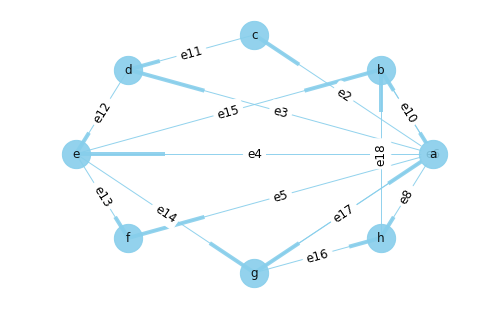

In [3]:
nodes = enter_nodes()
labels, vertex_pairs = create_edge_labels(vertex_pairs, labels, nodes)  
G = create_graph(labels)
plt.show()

In [4]:
print_adj_matrix(G)

Adjacency matrix: 
[[1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0 0]
 [0 1 0 0 0 1 1 0]
 [0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 1]
 [0 1 0 0 0 0 0 0]]




In [5]:
print_graph_stats(G)

*Graph Statistics
----------------_-
Number of vertices: 8
Number of edges: 17
Vertices: ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']
Vertices with self loops: ['a']
Edge | vertex_pairs
  e9 | (a, b)
  e2 | (a, c)
  e3 | (a, d)
  e4 | (a, e)
  e5 | (a, f)
  e6 | (a, a)
  e7 | (a, g)
  e8 | (a, h)
  e10 | (b, a)
  e11 | (c, d)
  e12 | (d, e)
  e13 | (e, f)
  e14 | (e, g)
  e15 | (e, b)
  e16 | (g, h)
  e17 | (g, a)
  e18 | (h, b)


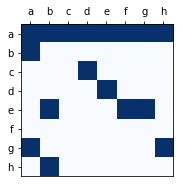

In [6]:
print_matrix(G)

In [7]:
start = input("Enter starting vertex for path: ")
end = input("Enter terminating vertex for path: ")
print("Simple paths from", start, "to", end, ":")
print_path(G,start,end)

Enter starting vertex for path: a
Enter terminating vertex for path: e
Simple paths from a to e :
['a', 'c', 'd', 'e']
['a', 'd', 'e']
['a', 'e']


In [8]:
#nx.find_cycle(G)
list(nx.simple_cycles(G))

[['b', 'a', 'h'],
 ['b', 'a', 'g', 'h'],
 ['b', 'a', 'e'],
 ['b', 'a', 'e', 'g', 'h'],
 ['b', 'a', 'd', 'e'],
 ['b', 'a', 'd', 'e', 'g', 'h'],
 ['b', 'a', 'c', 'd', 'e'],
 ['b', 'a', 'c', 'd', 'e', 'g', 'h'],
 ['b', 'a'],
 ['e', 'g', 'a'],
 ['e', 'g', 'a', 'd'],
 ['e', 'g', 'a', 'c', 'd'],
 ['g', 'a'],
 ['a']]